In [195]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### Read data from csv

In [196]:
data_train = pd.read_csv('train_test_data/train_data.csv')
data_test = pd.read_csv('train_test_data/test_data.csv')
data_train.head()

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Price
0,1,0,-0.635926,1.586480,-0.289721,1,0.821500,0.622918,23690.0
1,1,3,0.102449,0.079245,-0.556342,0,0.386249,0.622918,7490.0
2,0,3,-0.635926,0.079245,0.762394,0,0.396401,-1.605348,4490.0
3,1,0,0.102449,0.079245,-0.289721,1,0.821500,0.622918,27490.0
4,0,3,0.102449,0.079245,0.762394,0,-1.295536,-1.605348,5350.0


### Data information

#### Data train information

In [197]:
data_train.head()

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Price
0,1,0,-0.635926,1.586480,-0.289721,1,0.821500,0.622918,23690.0
1,1,3,0.102449,0.079245,-0.556342,0,0.386249,0.622918,7490.0
2,0,3,-0.635926,0.079245,0.762394,0,0.396401,-1.605348,4490.0
3,1,0,0.102449,0.079245,-0.289721,1,0.821500,0.622918,27490.0
4,0,3,0.102449,0.079245,0.762394,0,-1.295536,-1.605348,5350.0


- Data train has 1241 records
- No fields are null

#### Data test information

In [198]:
data_test.head()

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network,Price
0,1,3,0.840825,0.079245,-0.450843,0,0.386249,0.622918,6152
1,1,1,0.840825,0.079245,0.762394,0,0.014435,0.622918,8990
2,1,1,0.840825,0.079245,0.762394,0,0.386249,0.622918,8190
3,0,3,-2.095371,-1.928439,-6.270865,0,0.014435,-1.605348,450
4,1,3,2.317575,2.088892,-0.116763,0,0.014435,0.622918,18750


- Data test has 533 records
- No fields are null

### Modeling Train Data

#### Get x_train and y_train in data_train


In [199]:
x_train = data_train.drop('Price', axis=1)
x_train

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network
0,1,0,-0.635926,1.586480,-0.289721,1,0.821500,0.622918
1,1,3,0.102449,0.079245,-0.556342,0,0.386249,0.622918
2,0,3,-0.635926,0.079245,0.762394,0,0.396401,-1.605348
3,1,0,0.102449,0.079245,-0.289721,1,0.821500,0.622918
4,0,3,0.102449,0.079245,0.762394,0,-1.295536,-1.605348
...,...,...,...,...,...,...,...,...
1247,1,0,0.102449,1.586480,-0.289721,1,1.531775,0.622918
1248,0,2,0.840825,0.079245,0.762394,0,0.396401,-1.605348
1249,0,3,0.008043,-1.867600,-1.867893,0,-2.569001,-1.605348
1250,1,1,0.840825,1.586480,0.410731,0,0.386249,0.622918


In [200]:
y_train = data_train['Price']
y_train

0       23690.0
1        7490.0
2        4490.0
3       27490.0
4        5350.0
         ...   
1247    36990.0
1248     5790.0
1249      890.0
1250    23000.0
1251      590.0
Name: Price, Length: 1252, dtype: float64

#### Get x_test and y_test in data_test

In [201]:
x_test = data_test.drop(['Price'], axis=1)
x_test

,Screen type,Chip,RAM,ROM,Batery,OS,Screen resolution,Mobile network
0,1,3,0.840825,0.079245,-0.450843,0,0.386249,0.622918
1,1,1,0.840825,0.079245,0.762394,0,0.014435,0.622918
2,1,1,0.840825,0.079245,0.762394,0,0.386249,0.622918
3,0,3,-2.095371,-1.928439,-6.270865,0,0.014435,-1.605348
4,1,3,2.317575,2.088892,-0.116763,0,0.014435,0.622918
...,...,...,...,...,...,...,...,...
413,1,1,0.840825,0.079245,0.762394,0,0.386249,0.622918
414,0,0,-1.005114,0.079245,-0.289721,1,-1.483694,0.622918
415,1,0,0.102449,2.088892,-0.289721,1,0.821500,0.622918
416,1,3,0.840825,2.088892,-2.226741,0,0.690798,0.622918


In [202]:
y_test = data_test['Price']
y_test

0       6152
1       8990
2       8190
3        450
4      18750
       ...  
413     8190
414    14490
415    29790
416    20590
417     4190
Name: Price, Length: 418, dtype: int64

#### Creating and Modeling using Linear Regression

In [203]:
lrg = LinearRegression()

In [204]:
lrg.fit(x_train, y_train)

LinearRegression()

In [205]:
y_pred = lrg.predict(x_test)

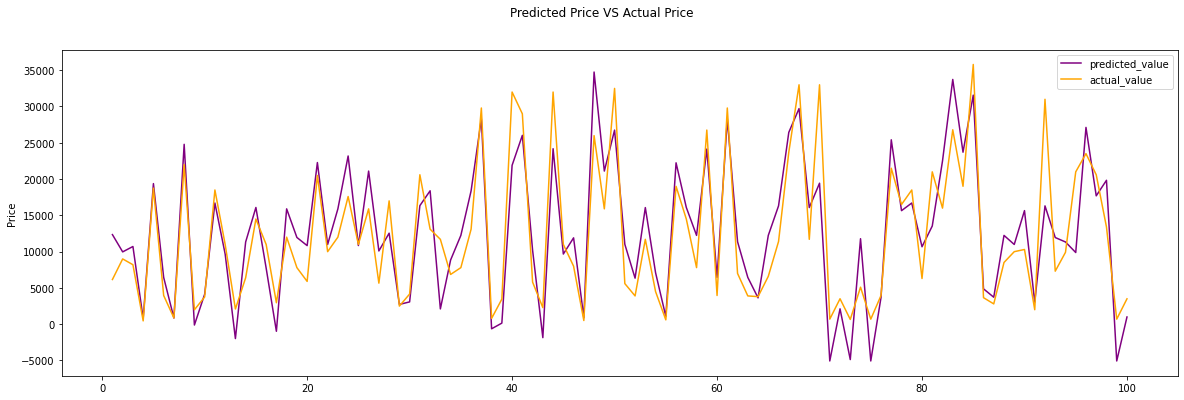

In [206]:
def plot_residuals(y_test, y_pred):
  indexes = list(range(1, len(y_pred)+1))[:100]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:100], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:100], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()

plot_residuals(y_test, y_pred)

In [207]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def accuracy_score(y_test, y_pred, algorithm):
  R2 = r2_score(y_test, y_pred)
  cross_val = cross_val_score(algorithm, x_train, y_train, cv=5)

  r2 = []
  r2.append(R2)

  CV = []
  CV.append(cross_val.mean())

  print("r_2 score:", R2, "\n")
  print("CV scores:", cross_val, "\n")
  print("CV scores mean:", cross_val.mean())

accuracy_score(y_test, y_pred, lrg)

r_2 score: 0.7869358358231062 

CV scores: [0.80010217 0.77741381 0.78855287 0.7589095  0.73082536] 

CV scores mean: 0.7711607419177984


In [208]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

In [209]:
parameter_grid = {
  'n_estimators': n_estimators,
  'max_depth':max_depth,
  'learning_rate':learning_rate,
  'min_child_weight':min_child_weight,
  'booster':booster,
  'base_score':base_score
}

In [210]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [211]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter

In [212]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [219]:
random_cv.best_params_

{'n_estimators': 900,
 'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.25}

In [220]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)

In [221]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [222]:
y_pred_advanced = regressor.predict(x_test)

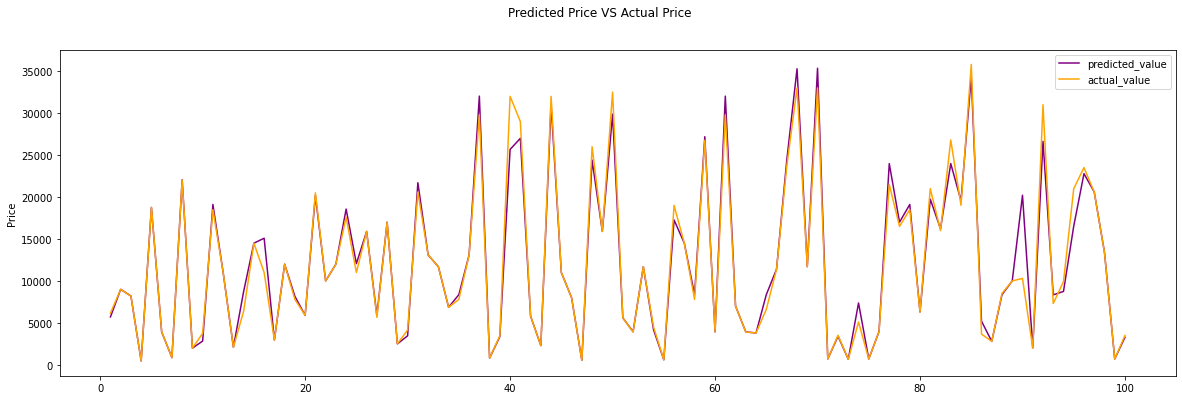

In [223]:
plot_residuals(y_test, y_pred_advanced)

In [224]:
accuracy_score(y_test, y_pred_advanced, regressor)

r_2 score: 0.9513376799746792 

CV scores: [0.94669972 0.9492781  0.95029938 0.93522077 0.96428049] 

CV scores mean: 0.9491556919068602
